In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [108]:
db17 = pd.read_csv('../../data/cleaned/utah_2017_bird.csv')
dm17 = pd.read_csv('../../data/cleaned/utah_2017_marina.csv')
dv17 = pd.read_csv('../../data/cleaned/utah_2017_vineyard.csv')
db18 = pd.read_csv('../../data/cleaned/utah_2018_bird.csv')
dm18 = pd.read_csv('../../data/cleaned/utah_2018_marina.csv')
dv18 = pd.read_csv('../../data/cleaned/utah_2018_vineyard.csv')


In [109]:
db17.head()

,Date (mm.dd.yyyy),Time 24hr,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
0,5/5/2017,0:00,15.37,2184,-100.0,8.41,10.70,2.7,0.7,92.2,9.16,0.1
1,5/5/2017,0:15,15.45,2139,-101.0,8.43,9.92,2.7,0.7,93.3,9.25,0.1
2,5/5/2017,0:30,15.49,2057,-102.3,8.45,8.90,2.8,0.7,94.8,9.40,0.2
3,5/5/2017,0:45,15.67,1978,-102.6,8.45,8.62,2.7,0.7,96.0,9.49,0.2
4,5/5/2017,1:00,15.34,2136,-100.2,8.41,9.88,2.6,0.7,92.7,9.22,0.1


In [110]:
dm17.head()

,Date (mm.dd.yyyy),Time 24hr,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,FDOM RFU
0,5/5/2017,0:00,15.75,1806,-104.7,8.33,6.41,3.2,1.0,90.0,8.88,0.2,3.1
1,5/5/2017,0:15,15.74,1808,-104.6,8.33,2.36,3.1,1.0,89.8,8.87,0.2,3.1
2,5/5/2017,0:30,15.69,1810,-104.5,8.33,7.16,3.5,1.1,89.6,8.85,0.2,3.1
3,5/5/2017,0:45,15.65,1814,-104.5,8.33,4.96,3.1,1.0,89.6,8.86,0.3,3.1
4,5/5/2017,1:00,15.63,1821,-104.5,8.33,6.72,3.1,1.0,89.5,8.86,0.3,3.1


In [111]:
dv17.head()

,Date (mm.dd.yyyy),Time 24hr,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
0,5/5/2017,0:00,15.02,1848,-100.1,8.36,16.84,4.4,1.3,90.2,9.04,0.4
1,5/5/2017,0:15,14.99,1847,-100.1,8.36,16.76,4.2,1.2,90.2,9.04,0.4
2,5/5/2017,0:30,14.96,1847,-100.1,8.36,16.82,4.3,1.3,90.1,9.04,0.4
3,5/5/2017,0:45,14.95,1848,-100.1,8.36,17.19,4.5,1.3,90.0,9.03,0.4
4,5/5/2017,1:00,14.92,1848,-100.0,8.36,16.85,4.5,1.3,89.8,9.02,0.4


In [112]:
db18.head()

,Time America/Boise UTC-06:00,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,Wiper Pos V,Cable Pwr V,Battery V
0,4/11/2018 11:15,11.06,1874,-114.2,8.39,46.27,14.1,3.8,89.3,9.78,0.7,1,13,5.6
1,4/11/2018 11:30,10.98,1879,-114.2,8.39,46.55,14.4,3.9,89.2,9.78,0.8,1,13,5.6
2,4/11/2018 11:45,10.58,1865,-113.8,8.39,48.62,17.5,4.8,87.5,9.68,0.9,1,13,5.6
3,4/11/2018 12:00,10.67,1864,-114.1,8.39,47.96,16.9,4.6,88.0,9.72,0.8,1,13,5.6
4,4/11/2018 12:15,10.71,1864,-114.3,8.40,49.47,16.4,4.5,88.3,9.75,0.8,1,13,5.6


In [113]:
dv18.head()

,Time America/Boise UTC-06:00,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,Wiper Pos V,Cable Pwr V,Battery V
0,4/11/2018 12:00,10.39,1885,-87.7,8.45,47.62,10.8,2.7,84.9,9.44,0.6,1,12.26,6.40
1,4/11/2018 12:15,11.67,1887,-89.3,8.48,43.17,9.1,2.3,90.4,9.75,0.5,1,12.23,6.40
2,4/11/2018 12:30,11.42,1890,-89.4,8.48,43.86,9.4,2.3,90.0,9.78,0.6,1,12.28,6.40
3,4/11/2018 12:45,11.40,1887,-89.7,8.49,43.42,10.2,2.5,89.6,9.73,0.6,1,12.43,6.39
4,4/11/2018 13:00,11.08,1885,-89.8,8.49,44.26,10.7,2.7,88.4,9.67,0.6,1,12.26,6.40


In [114]:
dm18.head()

,Time America/Boise UTC-06:00,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,Wiper Pos V,Cable Pwr V,Battery V,FDOM RFU
0,4/11/2018 10:30,11.88,1782,-146.1,8.20,42.49,15.3,4.1,89.1,9.58,0.6,1,13,5.2,1.2
1,4/11/2018 10:45,11.78,1783,-143.7,8.15,42.89,16.6,4.4,87.4,9.42,0.6,1,13,5.3,1.1
2,4/11/2018 11:00,11.79,1784,-144.3,8.17,41.24,18.2,4.9,89.0,9.58,0.7,1,13,5.2,1.2
3,4/11/2018 11:15,11.66,1783,-143.1,8.14,42.65,20.3,5.4,87.1,9.41,0.7,1,13,5.2,1.2
4,4/11/2018 11:30,11.68,1784,-143.5,8.15,42.06,15.8,4.2,87.5,9.45,0.7,1,13,5.2,1.2


## Convert the date time for the 17' 

In [115]:
timestamp = db17['Date (mm.dd.yyyy)'] + ' '+ db17['Time 24hr']
timestamp = pd.to_datetime(timestamp)
db17['Timestamp'] = timestamp
db17 = db17.set_index('Timestamp')
db17 = db17.drop(columns=['Date (mm.dd.yyyy)', 'Time 24hr'])

In [116]:
timestamp = dm17['Date (mm.dd.yyyy)'] + ' '+ dm17['Time 24hr']
timestamp = pd.to_datetime(timestamp)
dm17['Timestamp'] = timestamp
dm17 = dm17.set_index('Timestamp')
dm17 = dm17.drop(columns=['Date (mm.dd.yyyy)', 'Time 24hr'])

In [117]:
timestamp = dv17['Date (mm.dd.yyyy)'] + ' '+ dv17['Time 24hr']
timestamp = pd.to_datetime(timestamp)
dv17['Timestamp'] = timestamp
dv17 = dv17.set_index('Timestamp')
dv17 = dv17.drop(columns=['Date (mm.dd.yyyy)', 'Time 24hr'])

In [118]:
type(timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [119]:
db18['Timestamp'] = pd.to_datetime(db18['Time America/Boise UTC-06:00'])
db18 = db18.set_index('Timestamp')
db18 = db18.drop(columns=['Time America/Boise UTC-06:00'])

In [120]:
dm18['Timestamp'] = pd.to_datetime(dm18['Time America/Boise UTC-06:00'])
dm18 = dm18.set_index('Timestamp')
dm18 = dm18.drop(columns=['Time America/Boise UTC-06:00'])

In [121]:
dv18['Timestamp'] = pd.to_datetime(dv18['Time America/Boise UTC-06:00'])
dv18 = dv18.set_index('Timestamp')
dv18 = dv18.drop(columns=['Time America/Boise UTC-06:00'])

In [122]:
db17.head()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
Timestamp,,,,,,,,,,
2017-05-05 00:00:00,15.37,2184,-100.0,8.41,10.70,2.7,0.7,92.2,9.16,0.1
2017-05-05 00:15:00,15.45,2139,-101.0,8.43,9.92,2.7,0.7,93.3,9.25,0.1
2017-05-05 00:30:00,15.49,2057,-102.3,8.45,8.90,2.8,0.7,94.8,9.40,0.2
2017-05-05 00:45:00,15.67,1978,-102.6,8.45,8.62,2.7,0.7,96.0,9.49,0.2
2017-05-05 01:00:00,15.34,2136,-100.2,8.41,9.88,2.6,0.7,92.7,9.22,0.1


In [123]:
dv17.head()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
Timestamp,,,,,,,,,,
2017-05-05 00:00:00,15.02,1848,-100.1,8.36,16.84,4.4,1.3,90.2,9.04,0.4
2017-05-05 00:15:00,14.99,1847,-100.1,8.36,16.76,4.2,1.2,90.2,9.04,0.4
2017-05-05 00:30:00,14.96,1847,-100.1,8.36,16.82,4.3,1.3,90.1,9.04,0.4
2017-05-05 00:45:00,14.95,1848,-100.1,8.36,17.19,4.5,1.3,90.0,9.03,0.4
2017-05-05 01:00:00,14.92,1848,-100.0,8.36,16.85,4.5,1.3,89.8,9.02,0.4


In [124]:
dv17.head()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU
Timestamp,,,,,,,,,,
2017-05-05 00:00:00,15.02,1848,-100.1,8.36,16.84,4.4,1.3,90.2,9.04,0.4
2017-05-05 00:15:00,14.99,1847,-100.1,8.36,16.76,4.2,1.2,90.2,9.04,0.4
2017-05-05 00:30:00,14.96,1847,-100.1,8.36,16.82,4.3,1.3,90.1,9.04,0.4
2017-05-05 00:45:00,14.95,1848,-100.1,8.36,17.19,4.5,1.3,90.0,9.03,0.4
2017-05-05 01:00:00,14.92,1848,-100.0,8.36,16.85,4.5,1.3,89.8,9.02,0.4


In [125]:
db18.head()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,Wiper Pos V,Cable Pwr V,Battery V
Timestamp,,,,,,,,,,,,,
2018-04-11 11:15:00,11.06,1874,-114.2,8.39,46.27,14.1,3.8,89.3,9.78,0.7,1,13,5.6
2018-04-11 11:30:00,10.98,1879,-114.2,8.39,46.55,14.4,3.9,89.2,9.78,0.8,1,13,5.6
2018-04-11 11:45:00,10.58,1865,-113.8,8.39,48.62,17.5,4.8,87.5,9.68,0.9,1,13,5.6
2018-04-11 12:00:00,10.67,1864,-114.1,8.39,47.96,16.9,4.6,88.0,9.72,0.8,1,13,5.6
2018-04-11 12:15:00,10.71,1864,-114.3,8.40,49.47,16.4,4.5,88.3,9.75,0.8,1,13,5.6


In [126]:
dm18.head()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,Wiper Pos V,Cable Pwr V,Battery V,FDOM RFU
Timestamp,,,,,,,,,,,,,,
2018-04-11 10:30:00,11.88,1782,-146.1,8.20,42.49,15.3,4.1,89.1,9.58,0.6,1,13,5.2,1.2
2018-04-11 10:45:00,11.78,1783,-143.7,8.15,42.89,16.6,4.4,87.4,9.42,0.6,1,13,5.3,1.1
2018-04-11 11:00:00,11.79,1784,-144.3,8.17,41.24,18.2,4.9,89.0,9.58,0.7,1,13,5.2,1.2
2018-04-11 11:15:00,11.66,1783,-143.1,8.14,42.65,20.3,5.4,87.1,9.41,0.7,1,13,5.2,1.2
2018-04-11 11:30:00,11.68,1784,-143.5,8.15,42.06,15.8,4.2,87.5,9.45,0.7,1,13,5.2,1.2


In [127]:
dv18.head()

,Temp C,Sp Cond (uS/cm),pH (mV),pH,Turbidity (NTU),Chlorophyll (ug/L),Chlorophyll RFU,ODOSat%,ODO (mg/L),BGA-Phycocyanin RFU,Wiper Pos V,Cable Pwr V,Battery V
Timestamp,,,,,,,,,,,,,
2018-04-11 12:00:00,10.39,1885,-87.7,8.45,47.62,10.8,2.7,84.9,9.44,0.6,1,12.26,6.40
2018-04-11 12:15:00,11.67,1887,-89.3,8.48,43.17,9.1,2.3,90.4,9.75,0.5,1,12.23,6.40
2018-04-11 12:30:00,11.42,1890,-89.4,8.48,43.86,9.4,2.3,90.0,9.78,0.6,1,12.28,6.40
2018-04-11 12:45:00,11.40,1887,-89.7,8.49,43.42,10.2,2.5,89.6,9.73,0.6,1,12.43,6.39
2018-04-11 13:00:00,11.08,1885,-89.8,8.49,44.26,10.7,2.7,88.4,9.67,0.6,1,12.26,6.40


In [128]:
def show_graphs(dataframe, target_col):
    f, axes = plt.subplots(nrows=len(dataframe.columns), ncols=1,figsize=(10,50))
    plt.subplots_adjust(hspace=0.5)
    for i, col in enumerate(dataframe.columns):
        if col != target_col:
            dataframe[col].plot(ax=axes[i], title=col, color='b')
            axe = axes[i].twinx()
            dataframe[target_col].plot(ax=axe, color='r' )
            lines, labels = axes[i].get_legend_handles_labels()
            lines2, labels2 = axe.get_legend_handles_labels()
            axe.legend(lines + lines2, labels + labels2, loc="best")

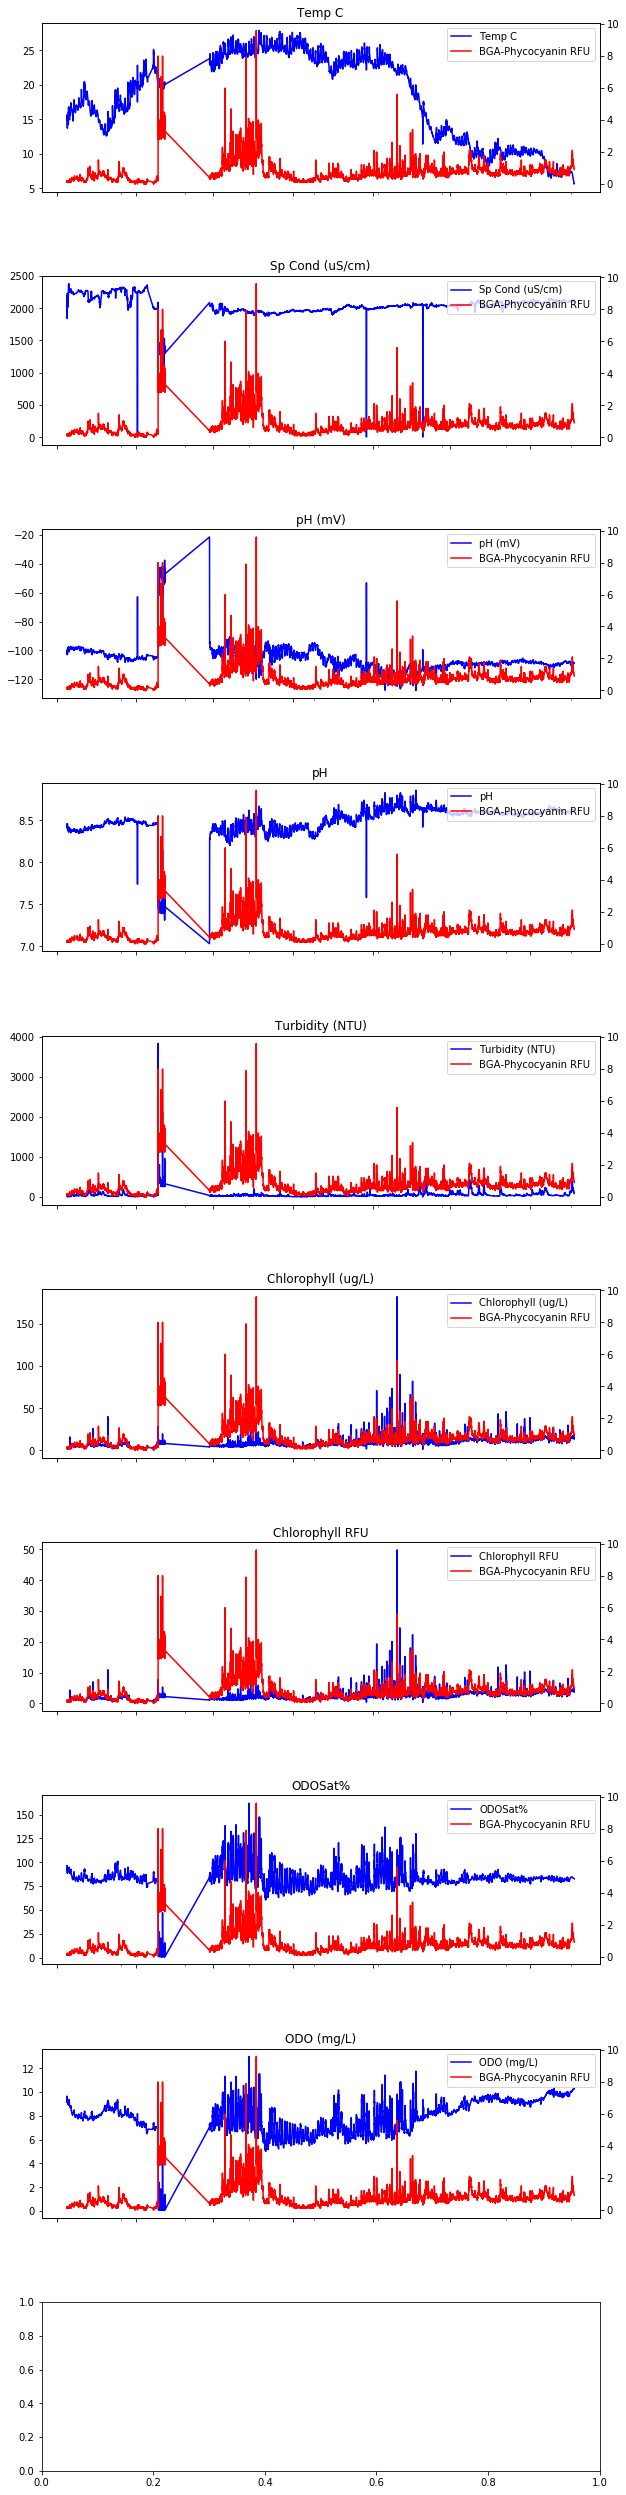

In [129]:
show_graphs(db17, 'BGA-Phycocyanin RFU')

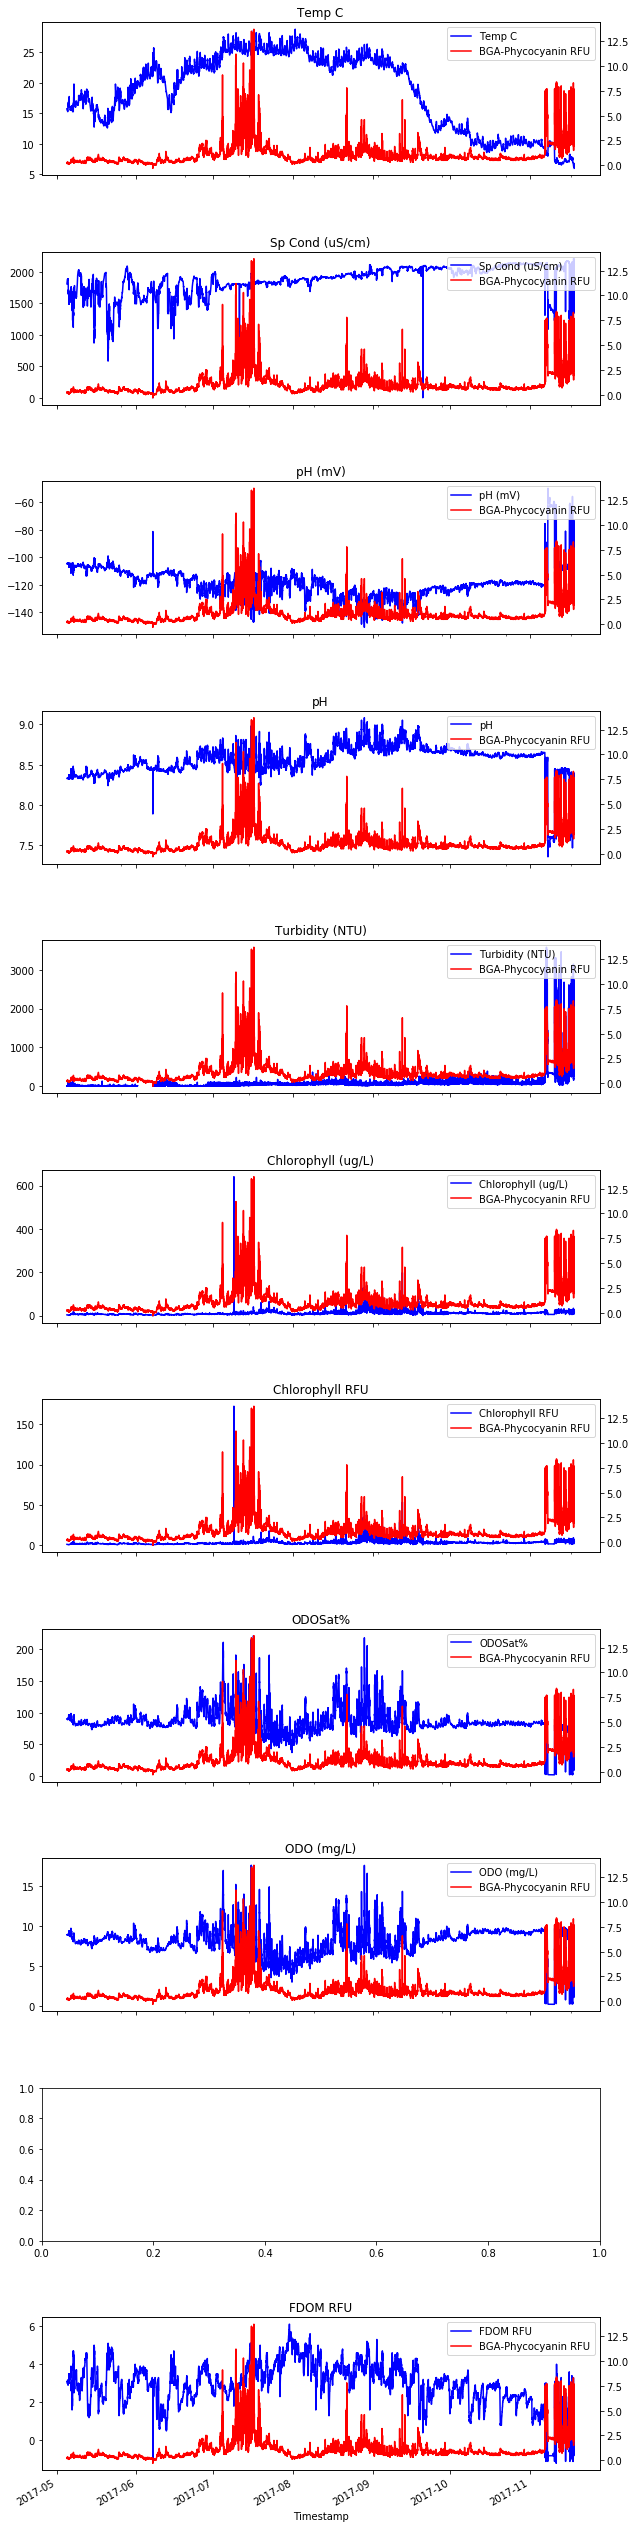

In [130]:
show_graphs(dm17, 'BGA-Phycocyanin RFU')

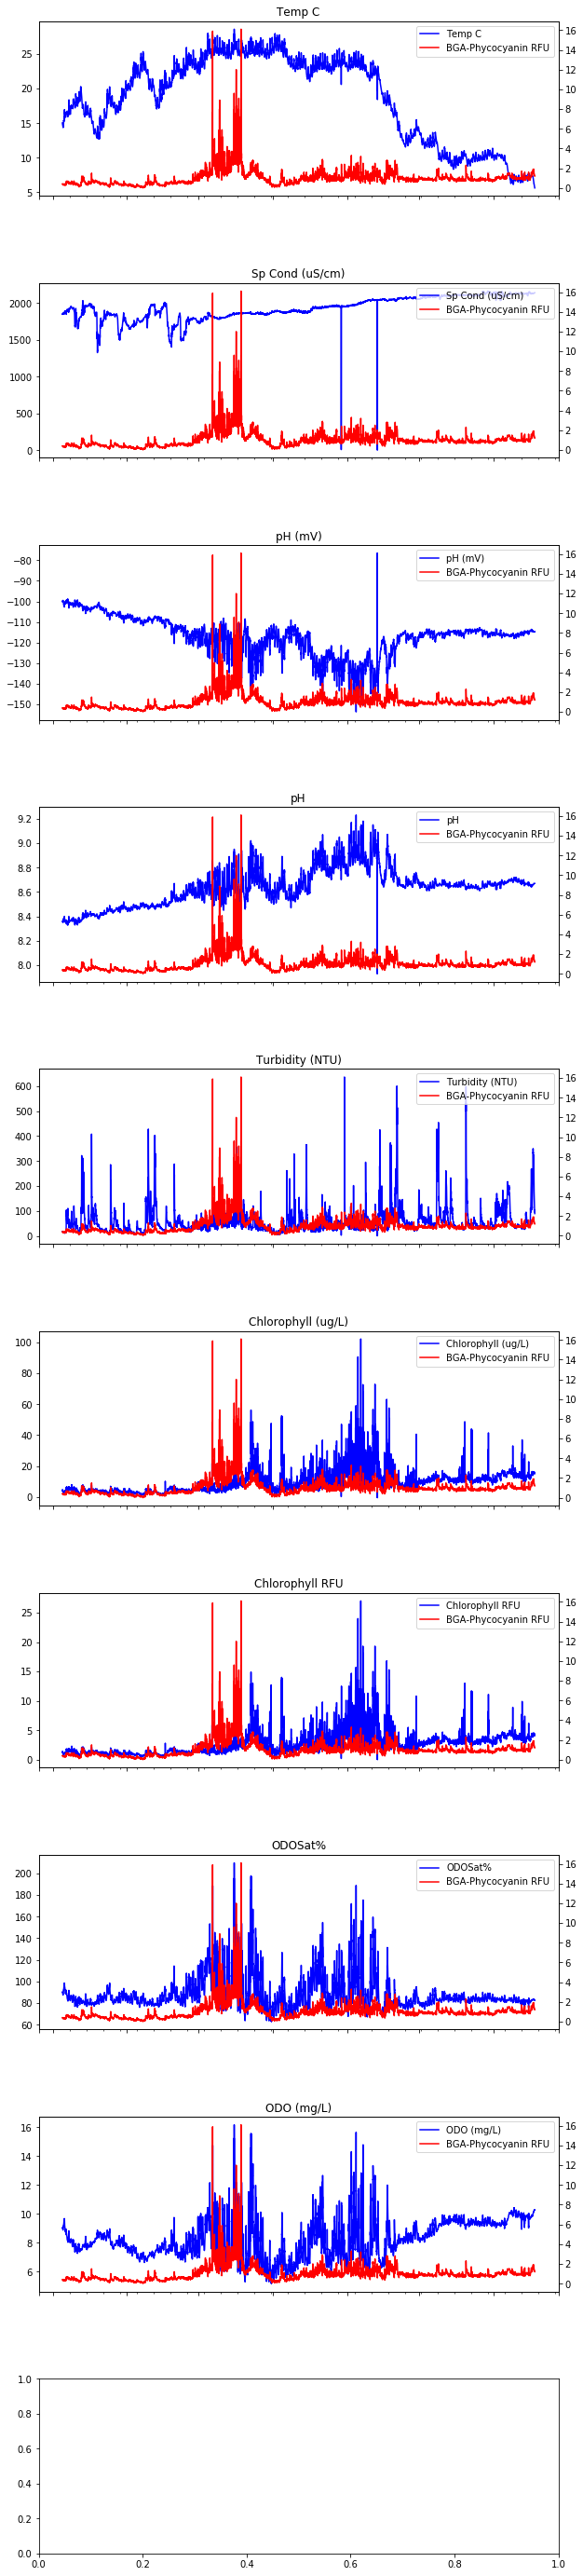

In [131]:
show_graphs(dv17, 'BGA-Phycocyanin RFU')

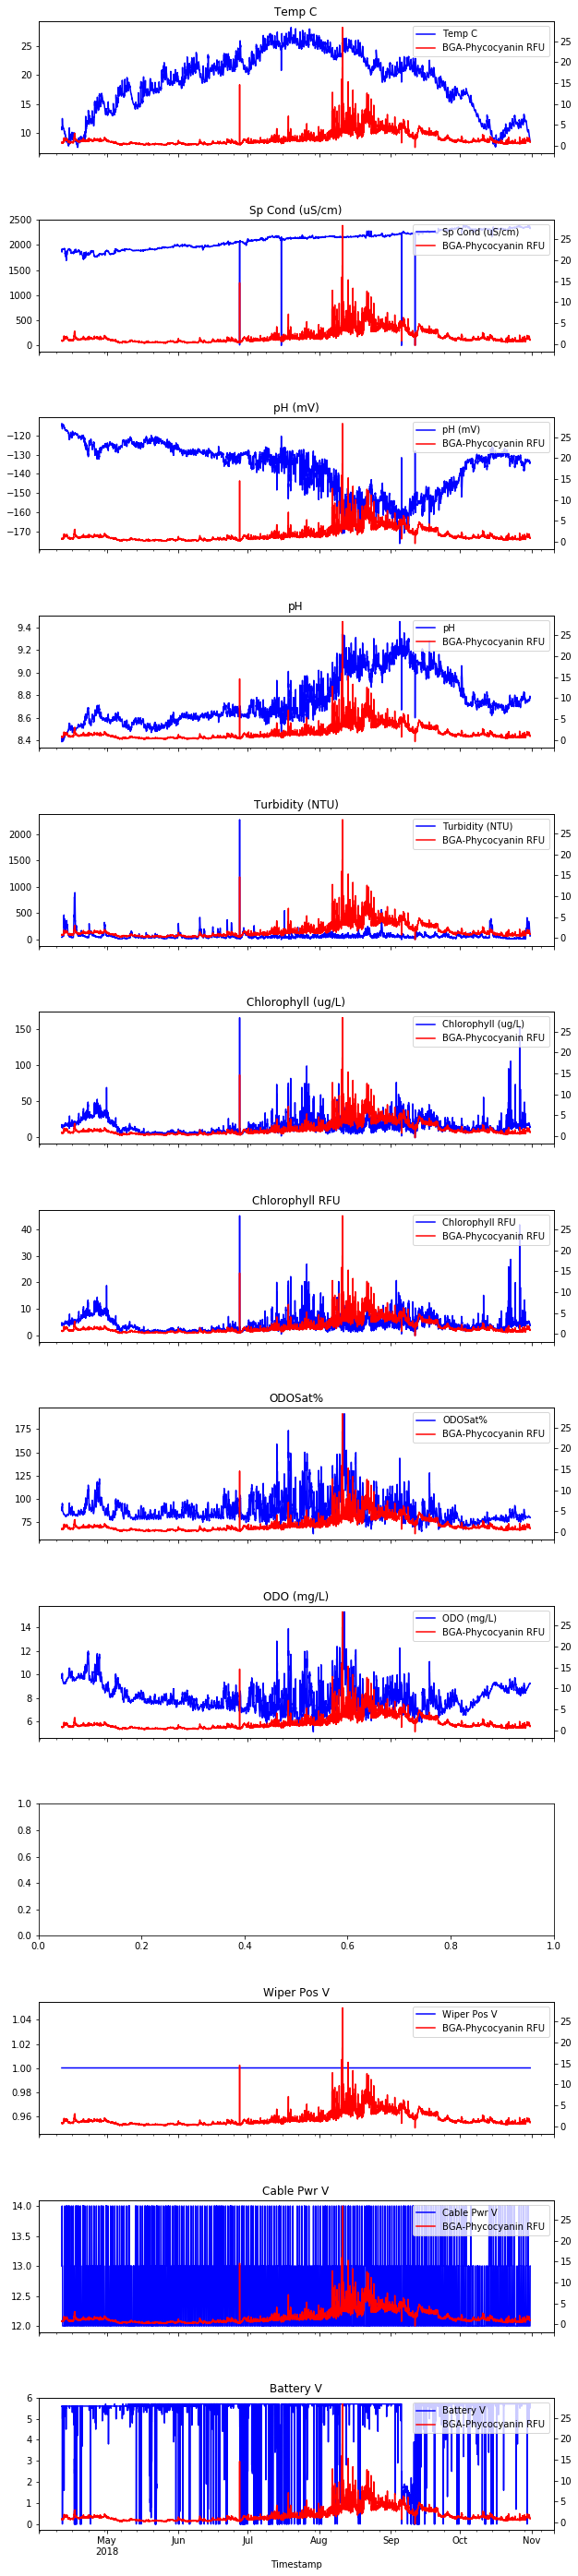

In [132]:
show_graphs(db18, 'BGA-Phycocyanin RFU')

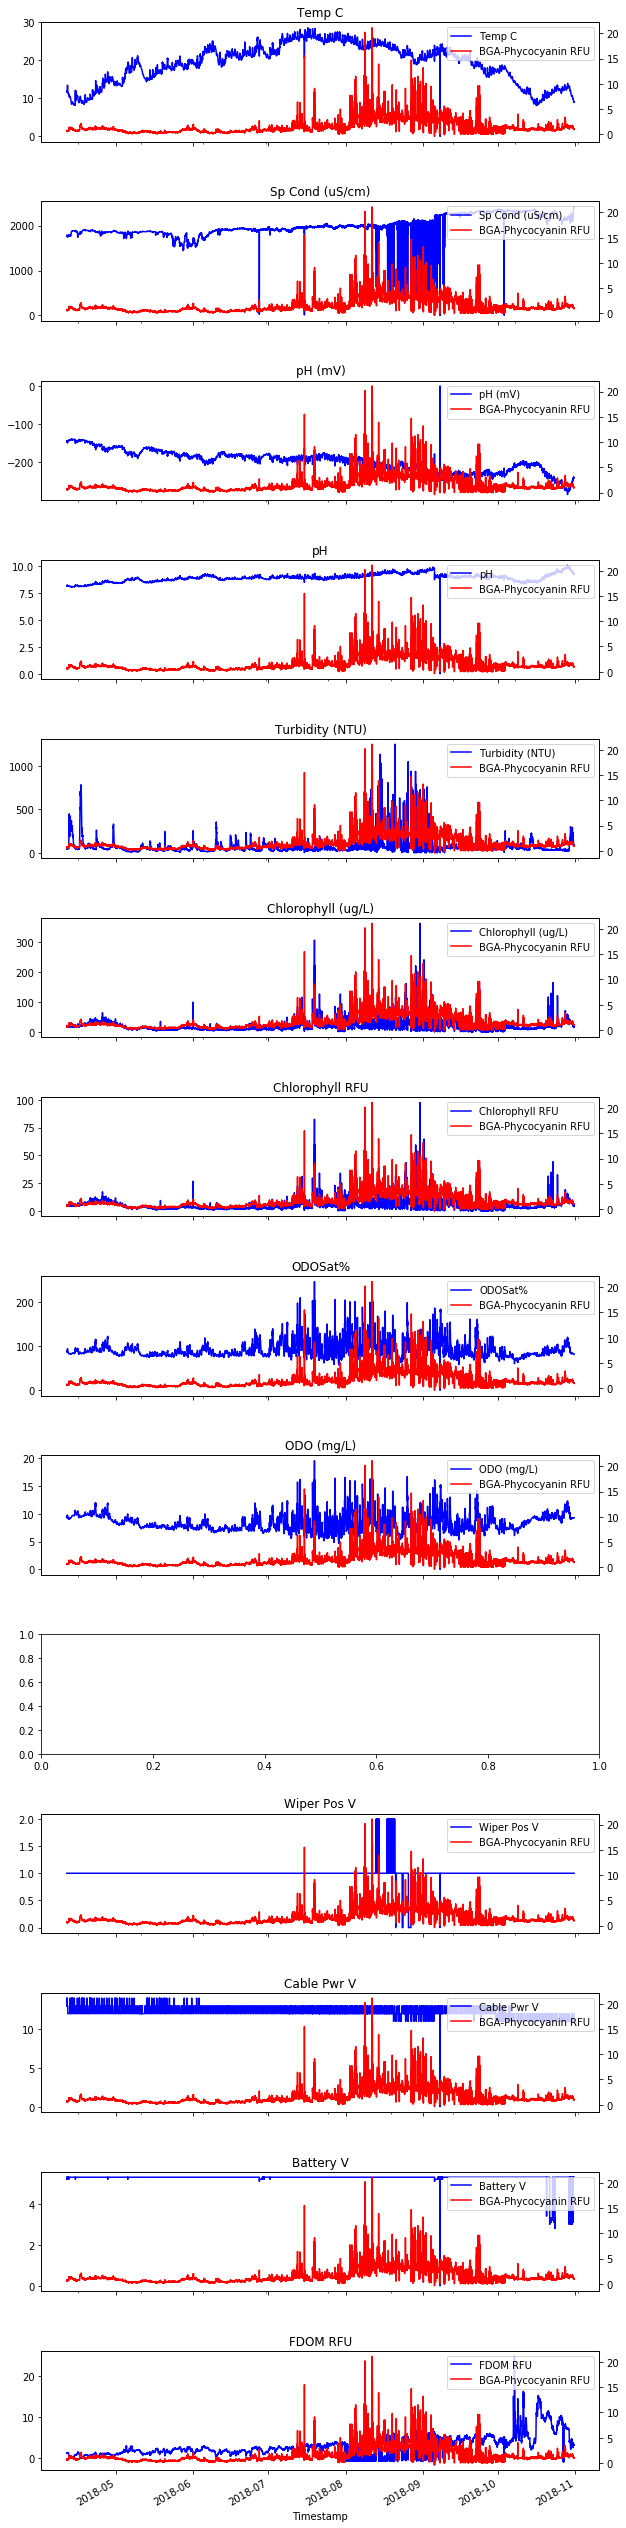

In [133]:
show_graphs(dm18, 'BGA-Phycocyanin RFU')

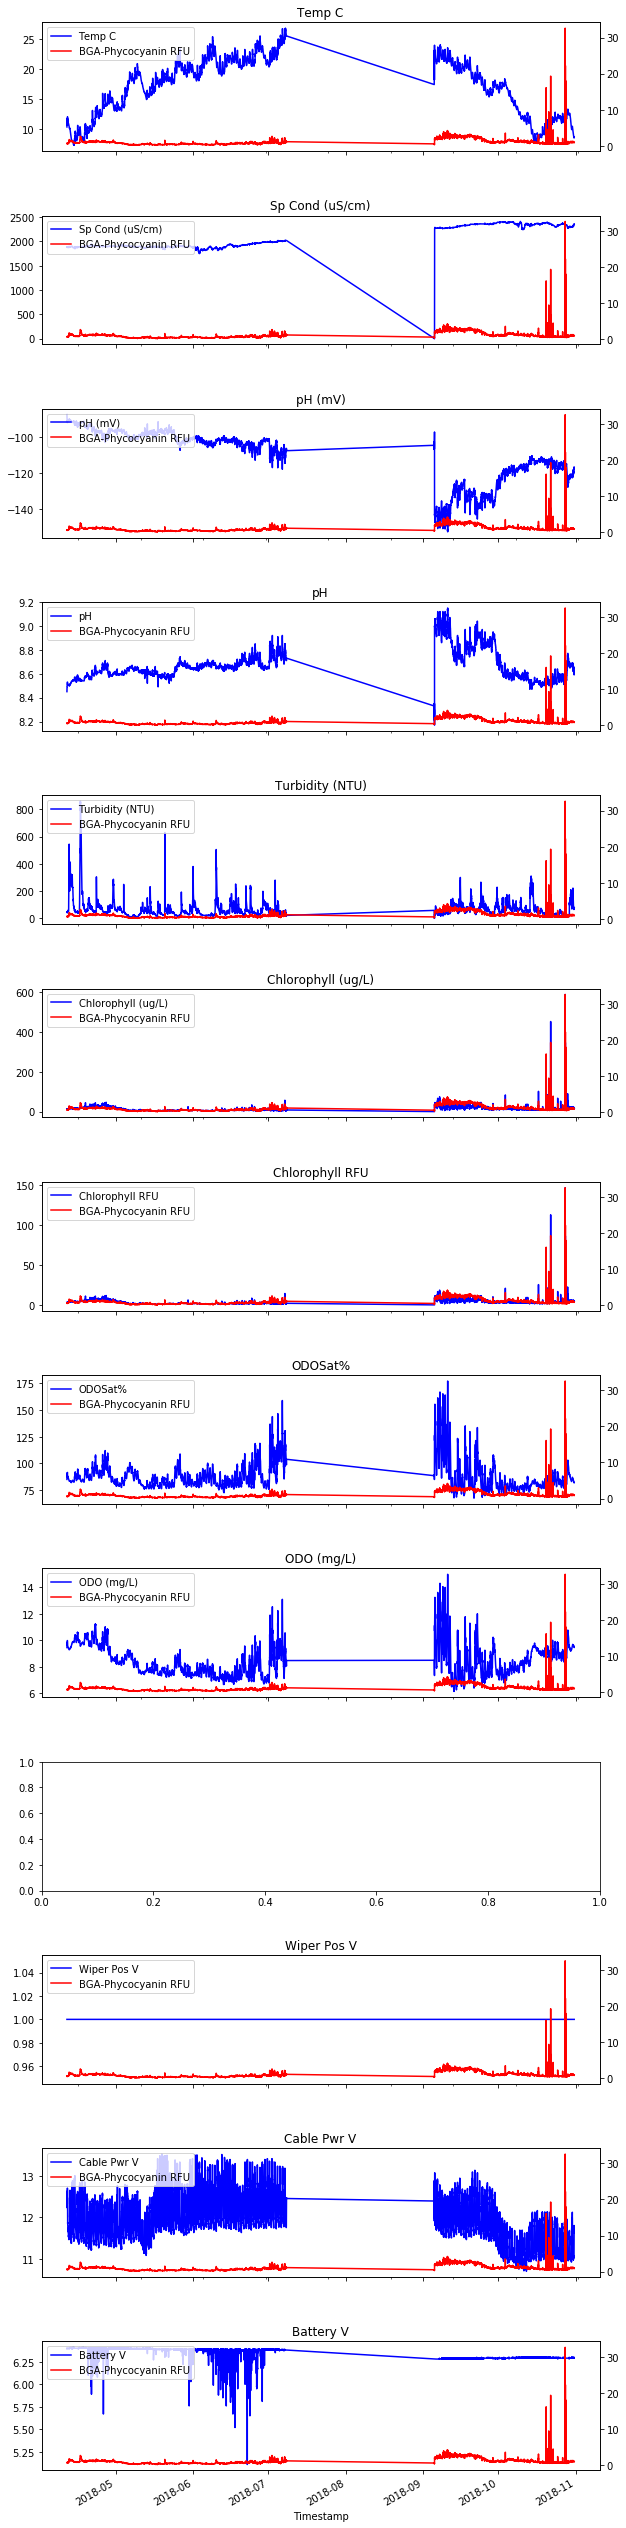

In [134]:
show_graphs(dv18, 'BGA-Phycocyanin RFU')